<a href="https://colab.research.google.com/github/Madhav-Ganorkar/Bank_Loan_Prediction/blob/main/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Loan Prediction

In [1]:
# Importing Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

In [2]:
# Uploading File
df = pd.read_csv("loan_approval_dataset.csv")
df.sample(10)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
686,687,0,Graduate,No,3000000,8400000,10,361,7700000,200000,7300000,1800000,Rejected
355,356,5,Not Graduate,No,7600000,24100000,18,721,21900000,11500000,22900000,7200000,Approved
2345,2346,3,Graduate,No,4100000,15300000,6,440,7500000,5100000,8200000,2000000,Rejected
1951,1952,0,Not Graduate,Yes,2500000,6700000,16,569,4500000,3400000,6200000,1300000,Approved
375,376,5,Not Graduate,Yes,1300000,5000000,10,755,2100000,2200000,4800000,1900000,Approved
914,915,2,Graduate,No,700000,2000000,8,806,1900000,1100000,2200000,400000,Approved
3901,3902,5,Graduate,No,2300000,4900000,4,529,6200000,3900000,9200000,2000000,Rejected
4123,4124,0,Not Graduate,Yes,6200000,16200000,6,508,5600000,5700000,21500000,3600000,Rejected
2904,2905,3,Not Graduate,Yes,5200000,11000000,12,830,8900000,5100000,16000000,7600000,Approved
1246,1247,1,Graduate,Yes,7600000,29300000,14,690,13900000,4000000,30000000,9100000,Approved


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [4]:
# Check for Null Values
df.isnull().sum()

,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


In [5]:
# Check for Duplicated Entry
dfi = df.duplicated().sum()
print(dfi)


0


In [6]:
df.drop(columns = 'loan_id', inplace = True)

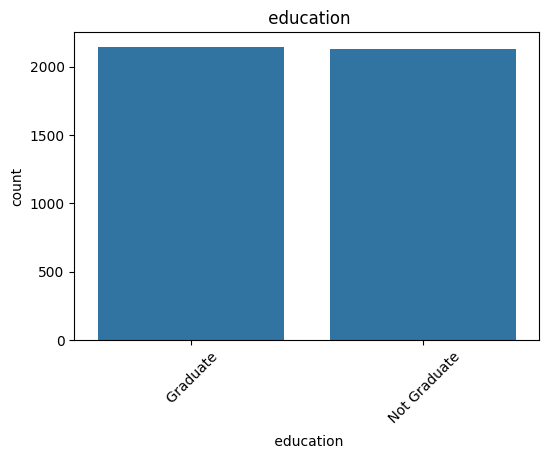

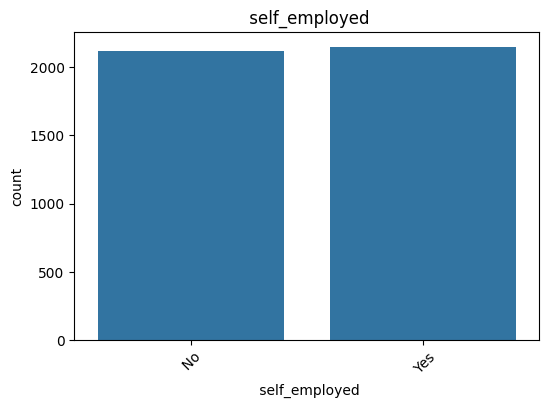

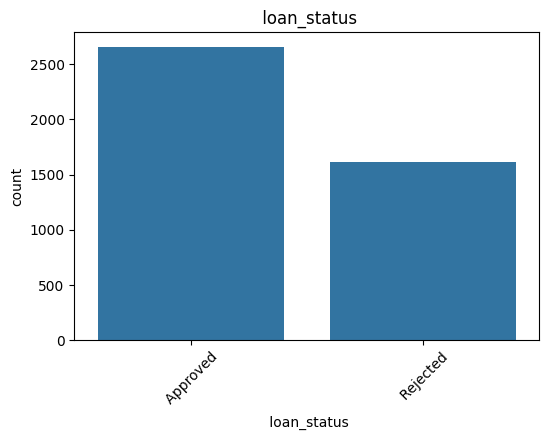

In [7]:
# Exploratory Data Analysis (EDA)
# Categorical Features Countplots
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col)
    plt.title(col)
    plt.xticks(rotation=45)
    plt.show()


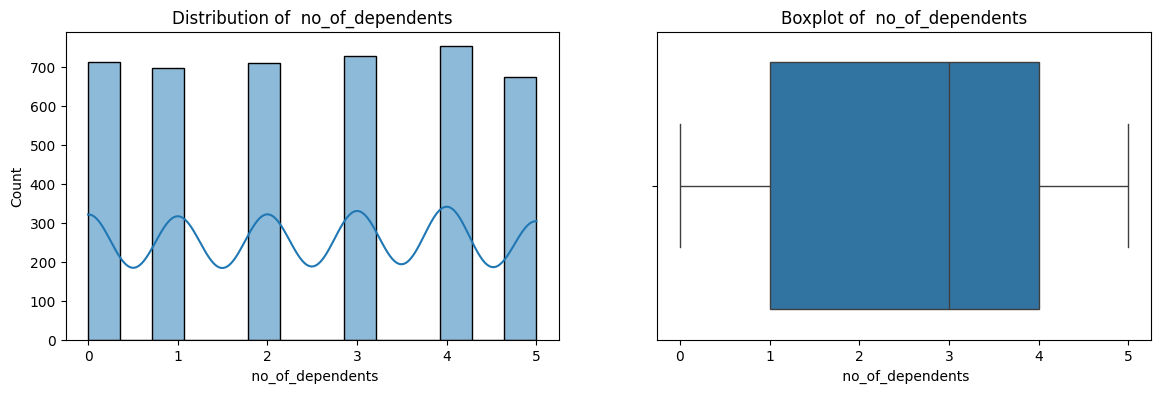

Skewness of  no_of_dependents: -0.01797054296784964
--------------------------------------------------


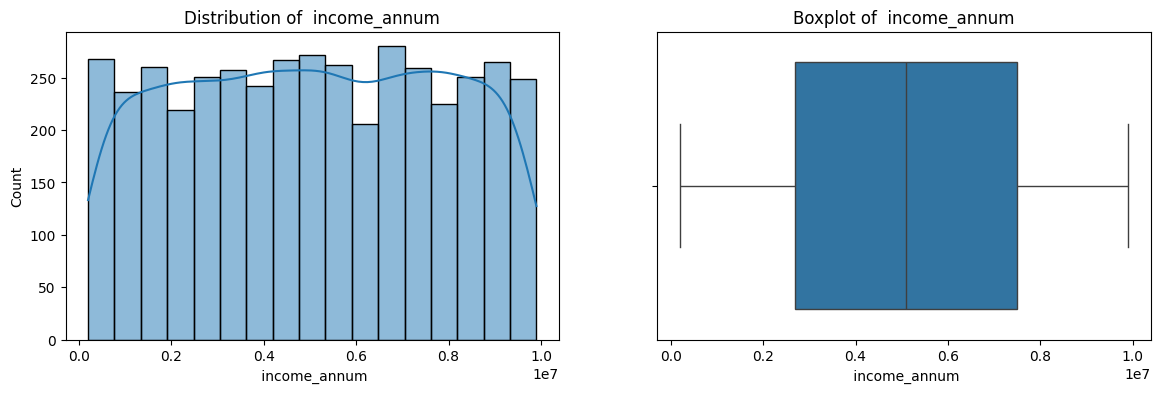

Skewness of  income_annum: -0.012814425096650109
--------------------------------------------------


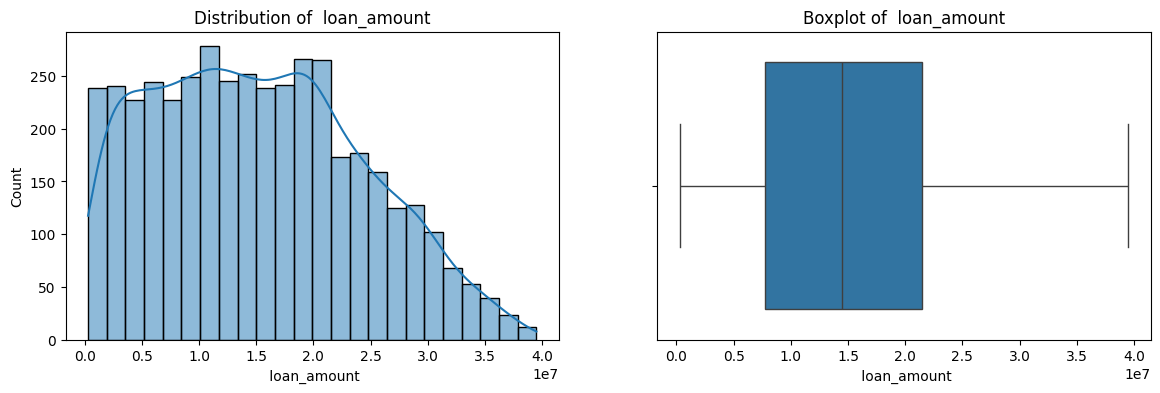

Skewness of  loan_amount: 0.30872388482299223
--------------------------------------------------


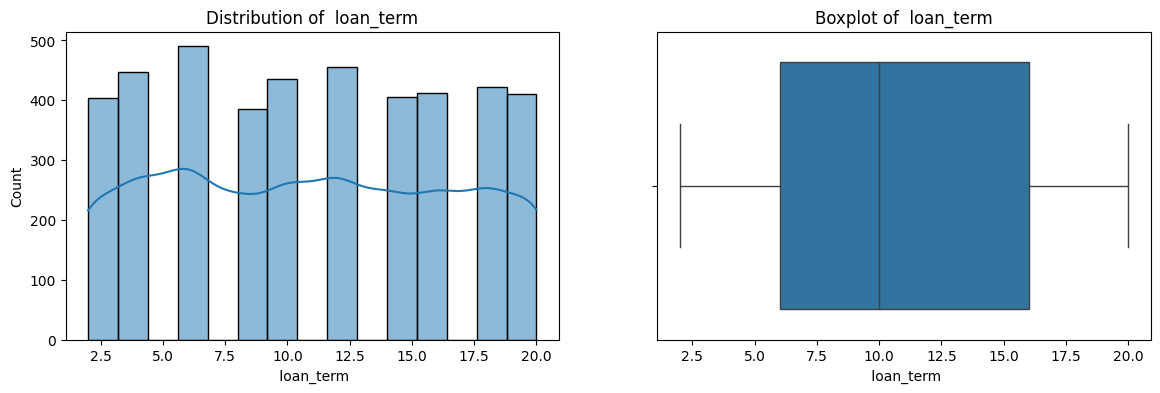

Skewness of  loan_term: 0.036358907356478495
--------------------------------------------------


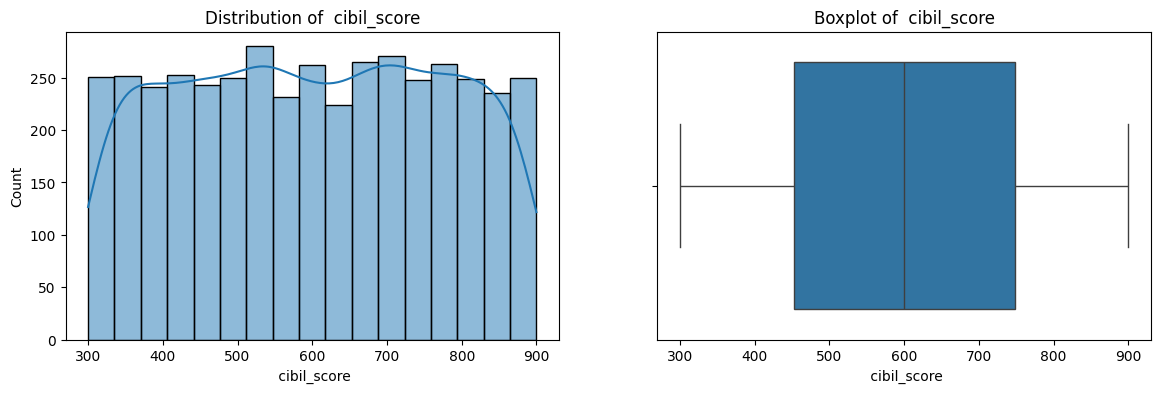

Skewness of  cibil_score: -0.009039277330065707
--------------------------------------------------


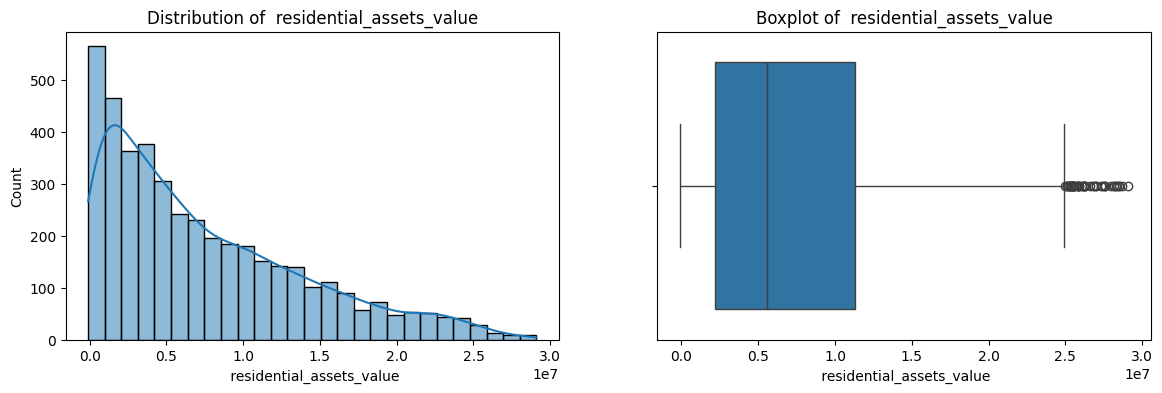

Skewness of  residential_assets_value: 0.9784505965115631
--------------------------------------------------


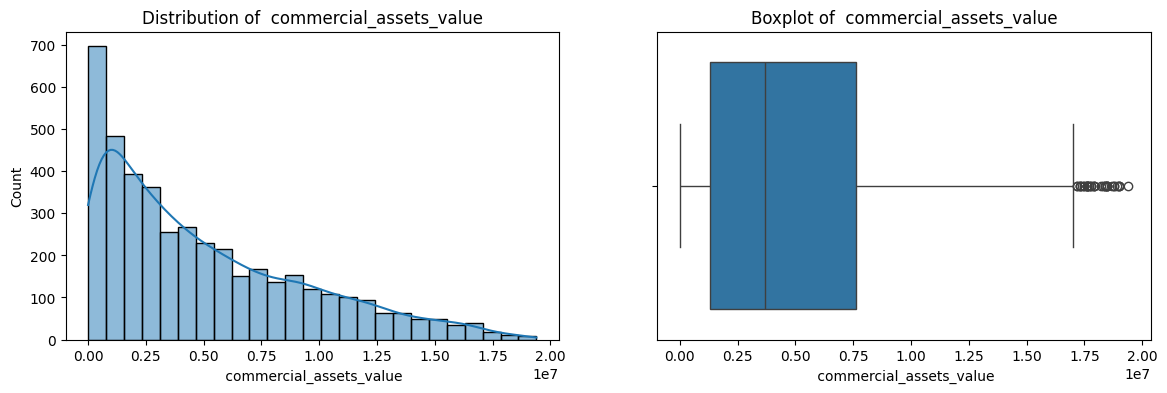

Skewness of  commercial_assets_value: 0.9577908874986114
--------------------------------------------------


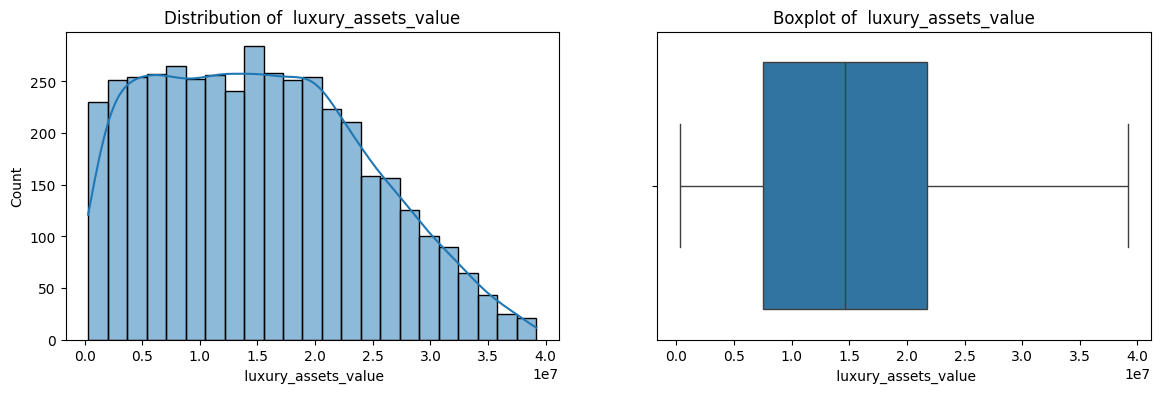

Skewness of  luxury_assets_value: 0.3222075028955774
--------------------------------------------------


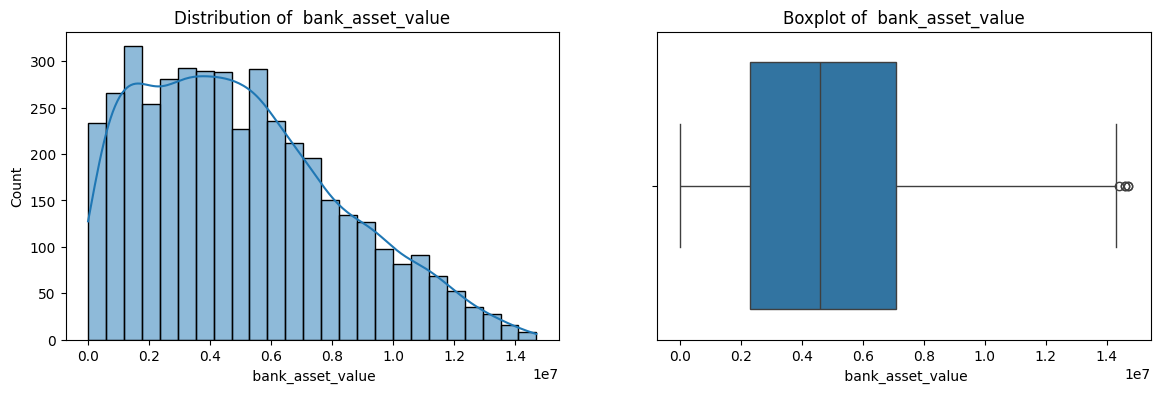

Skewness of  bank_asset_value: 0.5607250089736816
--------------------------------------------------


In [8]:
# Check Normal / Skewed Distribution (Before Outlier Removal)
num_cols = df.select_dtypes(include=['int64']).columns

for col in num_cols:
    plt.figure(figsize=(14,4))

    # Histogram + KDE
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

    plt.show()

    # Skewness
    print(f"Skewness of {col}: {df[col].skew()}")
    print("-" * 50)


In [9]:
# Outlier Treatment Based on Skewness
# If |skew| < 0.5 → Normal → Z-score
# If |skew| > 0.5 → Skewed → IQR

from scipy import stats

for col in num_cols:
    skew_value = df[col].skew()

    if abs(skew_value) < 0.5:
        print(f"Using Z-score for: {col}")
        df = df[(np.abs(stats.zscore(df[col])) < 3)]

    else:
        print(f"Using IQR for: {col}")
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df[col] = np.clip(df[col], lower, upper)


Using Z-score for:  no_of_dependents
Using Z-score for:  income_annum
Using Z-score for:  loan_amount
Using Z-score for:  loan_term
Using Z-score for:  cibil_score
Using IQR for:  residential_assets_value
Using IQR for:  commercial_assets_value
Using Z-score for:  luxury_assets_value
Using IQR for:  bank_asset_value


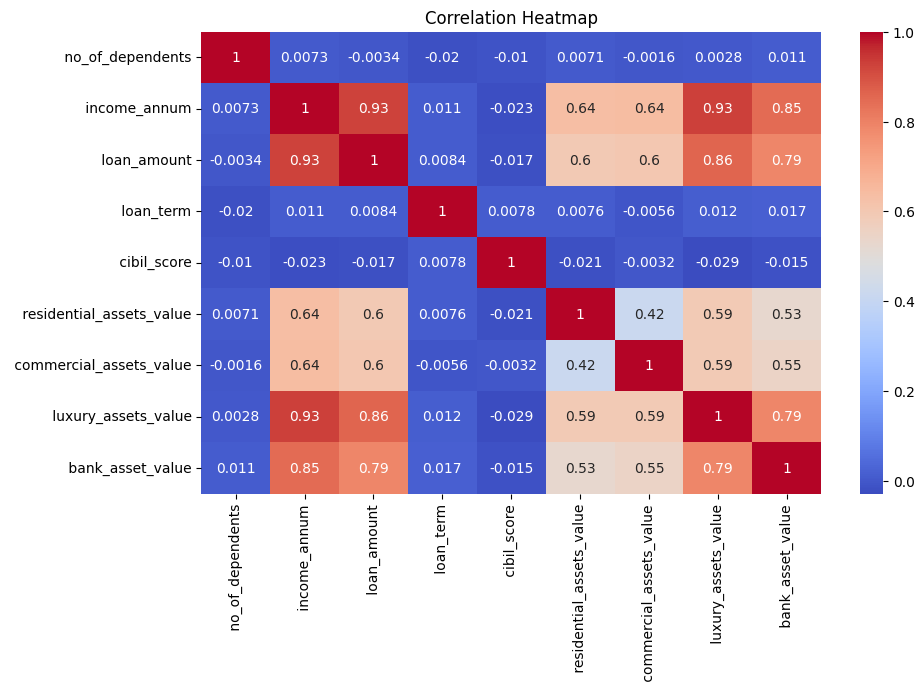

In [10]:
# Correlation Analysis (Numerical Columns Only)
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [11]:
# Label Encode all categorical columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [13]:
# There is a space in the name of the column, so we corrected the name of the column.
df.rename(columns={' loan_status': 'Loan_Status'}, inplace = True)


In [14]:
# Separate features (X) and target variable (y).
y = df['Loan_Status']     # change if different name
X = df.drop('Loan_Status', axis=1)

In [15]:
# Split the data into training and testing sets to evaluate the model’s performance.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# Scaling Numerical Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
#Train a Machine Learning Model
# Model Selection: Logistic Regressor
# Logistic Regression works best for binary loan approval classification Dataset.
model  = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [19]:
# Predictions & Accuracy
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.905152224824356

Confusion Matrix:
 [[498  38]
 [ 43 275]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92       536
           1       0.88      0.86      0.87       318

    accuracy                           0.91       854
   macro avg       0.90      0.90      0.90       854
weighted avg       0.90      0.91      0.90       854

